## Coined quantum walk on the two-dimensional grid

In [1]:
import hiperwalk as hpw
import numpy as np

### Defining the graph and the QW instance

Let set $n$ for the two-dimensional square grid graph with $n^2$ vertices.

In [2]:
n = 51

The next command creates a grid, which is an instance of the Graph class.

In [3]:
grid = hpw.Grid(n, diagonal=True, periodic=False)

The next command creates a QW on the grid, which is an instance of the Coined class.

In [4]:
qw = hpw.Coined(grid, shift='persistent', coin='grover')

### Setting the initial state with maximum spreading

The central vertex is $(\lfloor n/2\rfloor, \lfloor n/2\rfloor)$. In the next commad, we use np.array to add entrywise in the next command.

In [5]:
center = np.array((n // 2, n // 2))

Note that the computational basis is comprised of arcs, whose labels are $(v_1,v_2)$, where $v_1$, $v_2$ are vertices. Grid vertices have the form $(x,y)$ which represents the coordinate on the grid. Then, the label of an arc is $((x_1,y_1),(x_2,y_2))$.

In [6]:
psi0 = qw.state([(0.5, (center, center + (1, 1))),
                   (-0.5, (center, center + (1, -1))),
                   (-0.5, (center, center + (-1, 1))),
                   (0.5, (center, center + (-1, -1)))])

The initial state above represents a walker on the central vertex with the coin in superposition, which is not uniform because some amplitudes are negative in order to achieve maximum spreading.

### Probability distribution

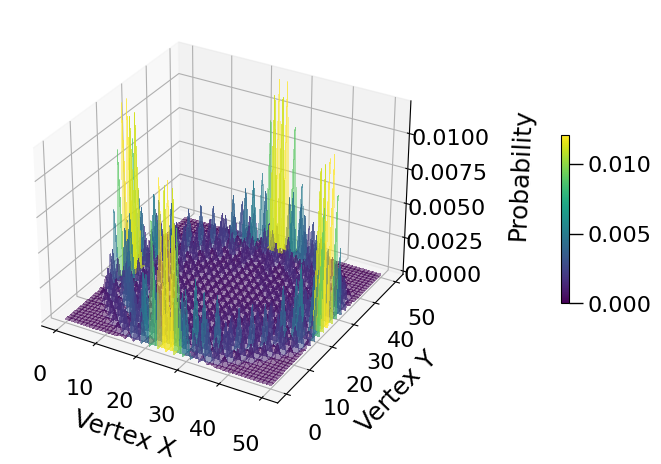

In [7]:
psi_final = qw.simulate(range=(n//2,n//2+1), state=psi0)
prob = qw.probability_distribution(psi_final)
hpw.plot_probability_distribution(prob, graph=grid, figsize=(9,4.5))

### Animating the quantum walk

In [8]:
list_of_states = qw.simulate(range = (10,n//2), state = psi0)
list_of_probs = qw.probability_distribution(list_of_states)
hpw.plot_probability_distribution(list_of_probs, graph=grid, animate=True, figsize=(9,4.5))